In [156]:
# import the required libraries

import pandas as pd
pd.options.display.max_columns = None
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [157]:
# load the dataset and convert it into a pandas dataframe
data = pd.read_csv('train.csv')

# view the number of rows and columns in the dataframe
data.shape

(1460, 81)

In [158]:
# view the first five records of the dataframe
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [159]:
# view all the columns of the dataframe
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:>

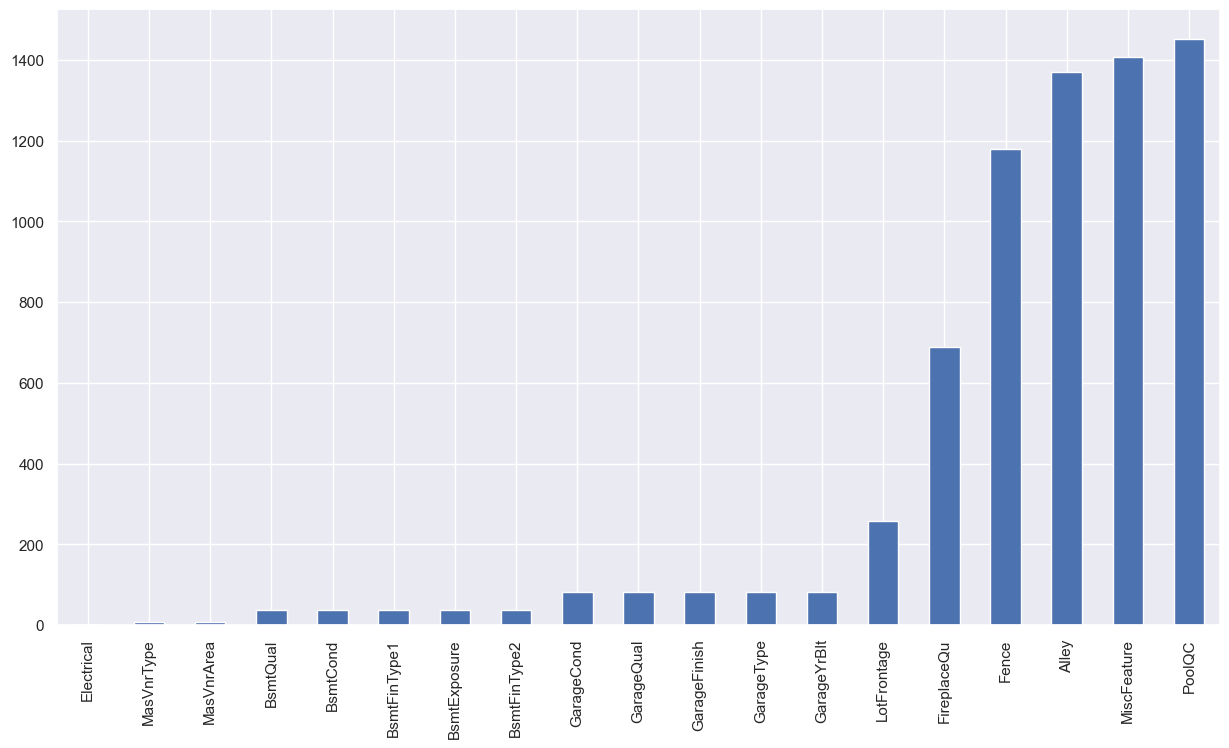

In [160]:
# let's plot a bar graph to estimate the missing values in the columns in which there are missing values

missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
plt.figure(figsize = (15, 8))
missing.plot.bar()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

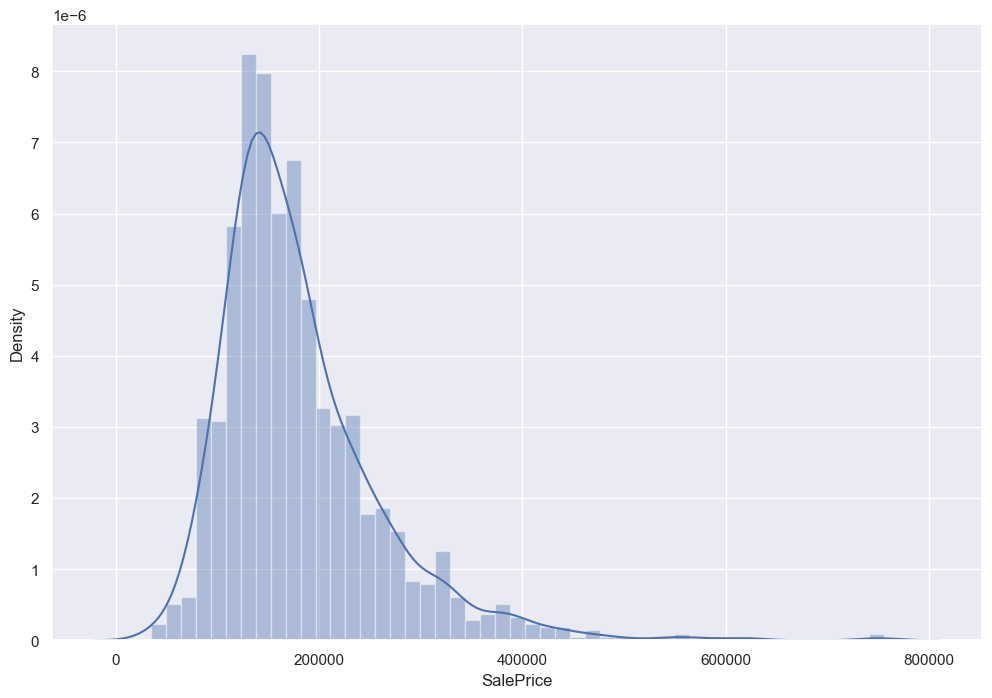

In [161]:
# plotting a distribution graph to view the distribution of the target column

sns.set(rc = {'figure.figsize':(12, 8)})
sns.distplot(data['SalePrice'])

# it is a little right skewed

In [162]:
# statistical summary of the target column

data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [163]:
# creating a sub dataframe having only the numerical variables

numerical_features = data.select_dtypes(include = [np.number])
print(len(numerical_features.columns))
numerical_features.columns

38


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [164]:
# creating a sub dataframe having only categorical variables

categorical_features = data.select_dtypes(include = [object])
print(len(categorical_features.columns))
categorical_features.columns

43


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [165]:
# let's see the correlation (by default it's pearson correlation coefficient) between the numerical columns

print(numerical_features.corr()['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:>

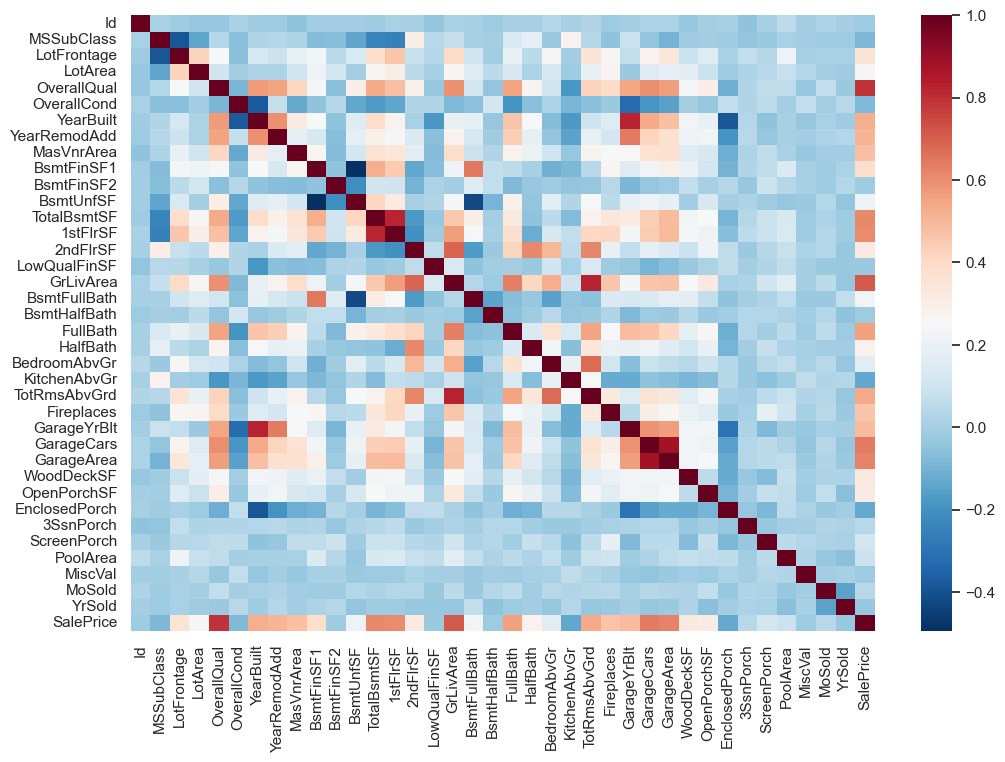

In [166]:
# visualizing the above correlation using heatmap

sns.heatmap(numerical_features.corr(), cmap= "RdBu_r", fmt='.2g', vmin=None, vmax=None)

In [167]:
# many independent features don't have a high correalation with the target variable, so regularization is necessary

In [168]:
# Create a correlation matrix
corr_matrix = numerical_features.drop(['SalePrice'], axis = 1).corr()

# Consider only the upper triangle of the matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find the pairs of features with correlation > 0.5
high_corr_pairs = [(i, j, upper.loc[i,j]) for i in upper.index for j in upper.columns if abs(upper.loc[i,j]) > 0.6]

high_corr_pairs_sorted = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)

# Print the highly correlated pairs of features
for pair in high_corr_pairs_sorted:
    print(pair)

('GarageCars', 'GarageArea', 0.882475414281462)
('YearBuilt', 'GarageYrBlt', 0.8256674841743408)
('GrLivArea', 'TotRmsAbvGrd', 0.8254893743088425)
('TotalBsmtSF', '1stFlrSF', 0.8195299750050339)
('2ndFlrSF', 'GrLivArea', 0.6875010641666033)
('BedroomAbvGr', 'TotRmsAbvGrd', 0.676619935742649)
('BsmtFinSF1', 'BsmtFullBath', 0.6492117535742649)
('YearRemodAdd', 'GarageYrBlt', 0.6422767797035356)
('GrLivArea', 'FullBath', 0.6300116462511148)
('2ndFlrSF', 'TotRmsAbvGrd', 0.6164226354915431)
('2ndFlrSF', 'HalfBath', 0.6097073002717436)
('OverallQual', 'GarageCars', 0.6006707165907149)


In [169]:
# list to remove columns with high multicollinearity and low collinearity with the independent feature
high_multi_coll = ['GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
                 'BsmtFullBath', 'FullBath', 'GarageCars']

In [170]:
corr_matrix = numerical_features.corr()
saleprice_corr = corr_matrix['SalePrice'].abs().sort_values()

# Print the features with correlation less than 0.3
low_corr_features = saleprice_corr[saleprice_corr < 0.3].index.tolist()
print(low_corr_features)

['BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', '3SsnPorch', 'MoSold', 'OverallCond', 'MSSubClass', 'PoolArea', 'ScreenPorch', 'EnclosedPorch', 'KitchenAbvGr', 'BedroomAbvGr', 'BsmtUnfSF', 'BsmtFullBath', 'LotArea', 'HalfBath']


In [171]:
# Calculates the percentage of missing values in each column of the 'data' dataframe
missing_percentages = data.isnull().sum() / len(data) * 100

# Selects the columns that have more than 80% missing values and saves their names in a list
high_missing_cols = missing_percentages[missing_percentages > 80].index.tolist()

# Prints the list of columns with more than 80% missing values
print(high_missing_cols)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [172]:
features_to_drop = set(high_multi_coll + low_corr_features + high_missing_cols)

In [173]:
# drop the unnecessary features from the dataframe

data.drop(list(features_to_drop), axis = 1, inplace = True)
data.shape

(1460, 51)

In [174]:
# also drop these features from the numerical_features dataframe

numerical_features.drop(columns=[col for col in numerical_features.columns if col in features_to_drop], inplace=True)

In [175]:
# check the missing values in numerical_features
numerical_features.isnull().sum()

LotFrontage     259
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
TotalBsmtSF       0
GrLivArea         0
Fireplaces        0
WoodDeckSF        0
OpenPorchSF       0
SalePrice         0
dtype: int64

In [176]:
# impute the missing values using KNN Imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

# create a new dataframe with only the columns to impute
cols_to_impute = ['LotFrontage', 'MasVnrArea']
data_to_impute = data[cols_to_impute]

# perform KNN imputation on the selected columns
imputed_cols = imputer.fit_transform(data_to_impute)

# replace the original columns with the imputed values
data[cols_to_impute] = imputed_cols 
numerical_features[cols_to_impute] = imputed_cols

In [177]:
numerical_features.isnull().sum()

LotFrontage     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
GrLivArea       0
Fireplaces      0
WoodDeckSF      0
OpenPorchSF     0
SalePrice       0
dtype: int64

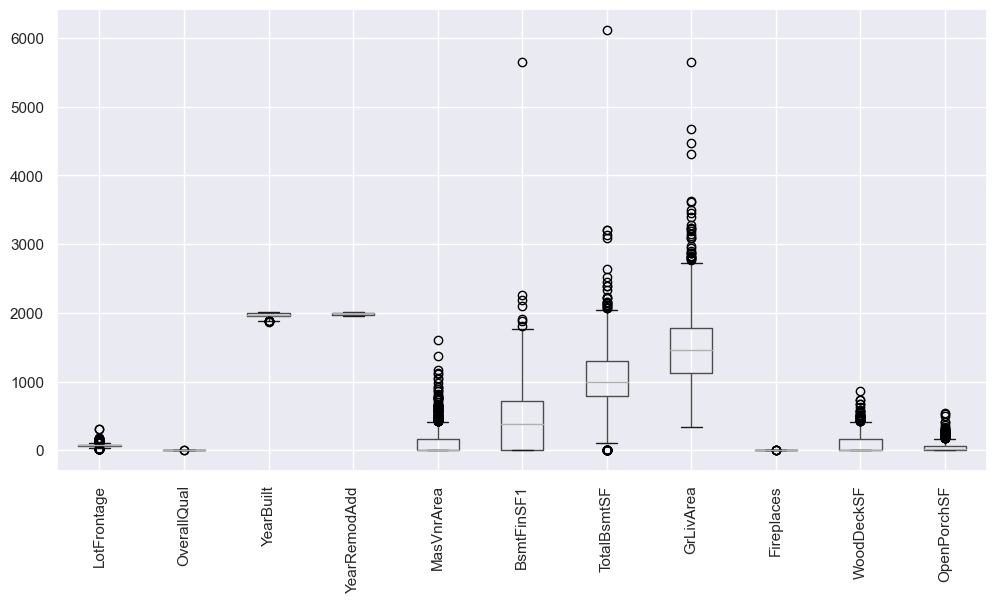

In [178]:
# drop the 'SalePrice' column from the 'numerical_features' DataFrame and creates a boxplot of the remaining columns

numerical_features.drop(columns = ['SalePrice']).boxplot(figsize=(12,6))
plt.xticks(rotation=90)
plt.show()

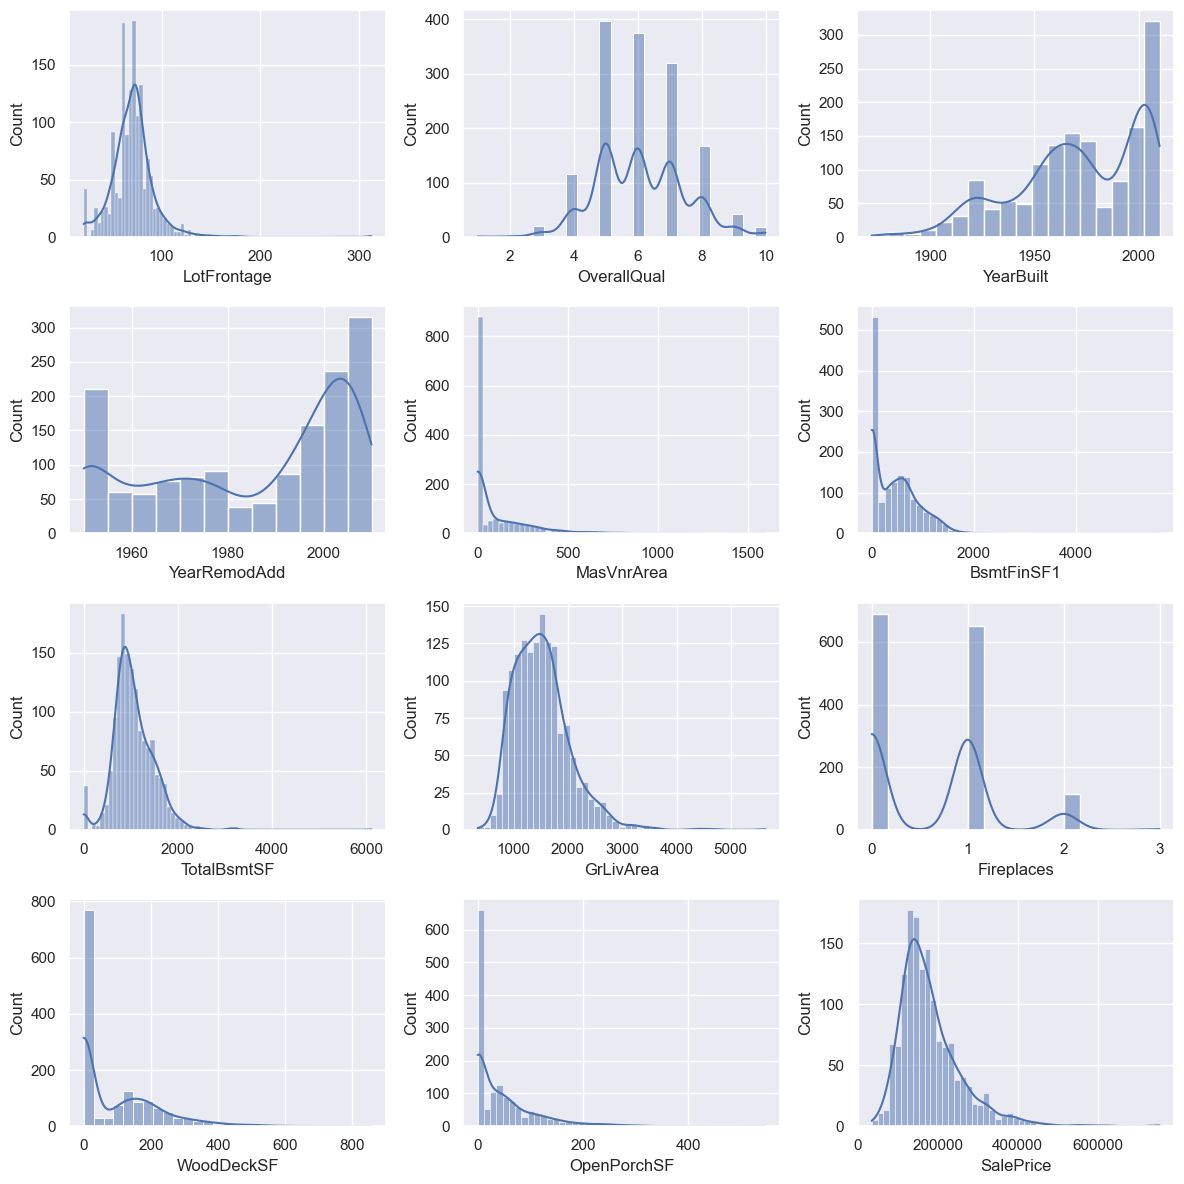

In [179]:
# Create a subplot with 12 density plots for each numerical feature
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))

# plot the histogram for each of the numerical feature to see their distribution
for i, col in enumerate(numerical_features.columns):
    sns.histplot(numerical_features[col], kde=True, ax=axes[i//3, i%3])
    
plt.tight_layout()
plt.show()

In [180]:
# create a list of continuous numerical features
continuous_features = ['LotFrontage', 'MasVnrArea' , 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF'] 

In [181]:
# create a list of discrete numerical features
discrete_features = ['OverallQual','YearBuilt', 'YearRemodAdd', 'Fireplaces']

In [182]:
# perform logarithmic transform for the continuous features to normalize them
for feat in continuous_features:
    data[feat] = np.log1p(data[feat])

In [183]:
# drop the unnecessary columns from the categorical features dataframe
categorical_features.drop(columns=[col for col in categorical_features.columns if col in features_to_drop], inplace=True)

In [184]:
categorical_features.shape

(1460, 39)

In [185]:
# check the null values in categorical features
categorical_features.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [186]:
from sklearn.impute import SimpleImputer

# impute the missing values in Garage related features with 'No Garage'
imputer = SimpleImputer(strategy='constant', fill_value='No Garage')
data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = imputer.fit_transform(data[['GarageType', 
                                                                    'GarageFinish', 'GarageQual', 'GarageCond']])
    
categorical_features[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = imputer.fit_transform(categorical_features[['GarageType', 
                                                                                                    'GarageFinish', 'GarageQual', 'GarageCond']])

In [187]:
# Create a list of basement features with missing values
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

# Fill missing values with mode
for feature in basement_features:
#     print(feature, data[feature].isnull().sum(), data[feature].mode()[0])      
    data[feature].fillna(data[feature].mode()[0], inplace=True)
    categorical_features[feature].fillna(data[feature].mode()[0], inplace=True)

In [188]:
# check the null values in the categorical features
categorical_features.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType         0
GarageFinish       0
GarageQual         0
GarageCond         0
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [189]:
# fill the missing values in 'FireplaceQu' and 'Electrical' with 'No Fireplace' and the mode respectively

data["FireplaceQu"].fillna("No Fireplace", inplace= True)
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace= True)
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0], inplace= True)


In [190]:
data.isnull().sum()

MSZoning         0
LotFrontage      0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
GrLivArea        0
KitchenQual      0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [191]:
data.shape

(1460, 51)

In [192]:
data.head()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,4.189655,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,6.753438,GasA,Ex,Y,SBrkr,7.444833,Gd,Typ,0,No Fireplace,Attchd,RFn,TA,TA,Y,0.000000,4.127134,WD,Normal,208500
1,RL,4.394449,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,7.141245,GasA,Ex,Y,SBrkr,7.141245,TA,Typ,1,TA,Attchd,RFn,TA,TA,Y,5.700444,0.000000,WD,Normal,181500
2,RL,4.234107,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,6.825460,GasA,Ex,Y,SBrkr,7.488294,Gd,Typ,1,TA,Attchd,RFn,TA,TA,Y,0.000000,3.761200,WD,Normal,223500
3,RL,4.110874,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,6.629363,GasA,Gd,Y,SBrkr,7.448916,Gd,Typ,1,Gd,Detchd,Unf,TA,TA,Y,0.000000,3.583519,WD,Abnorml,140000
4,RL,4.442651,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,7.044033,GasA,Ex,Y,SBrkr,7.695758,Gd,Typ,1,TA,Attchd,RFn,TA,TA,Y,5.262690,4.442651,WD,Normal,250000


In [193]:
test_data = pd.read_csv('formulatedtest.csv')

In [194]:
categorical_features = categorical_features.columns.tolist() + discrete_features

In [195]:
combined_data = pd.concat([data, test_data], axis=0)

# One hot encode categorical_features
combined_data = pd.get_dummies(combined_data, columns=categorical_features)

# Separate data and test_data
train_df = combined_data.iloc[:len(data), :]
test_df = combined_data.iloc[len(data):, :]
test_df.drop(['SalePrice'], axis= 1, inplace= True)

In [196]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply scaling to the continuous features in train_df and test_df
train_df[continuous_features] = scaler.fit_transform(train_df[continuous_features])
test_df[continuous_features] = scaler.fit_transform(test_df[continuous_features])

In [197]:
combined_data.shape

(2919, 451)

In [198]:
combined_data.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,WoodDeckSF,OpenPorchSF,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedD

In [200]:
X_train = train_df.drop(['SalePrice'], axis = 1)
y_train = train_df['SalePrice']

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# create the Linear Regression model
lin_reg = LinearRegression()

# define the hyperparameters to tune
hyperparameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# create the GridSearchCV object
grid_search = GridSearchCV(lin_reg, hyperparameters, cv=5)

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best hyperparameters:  {'fit_intercept': True, 'normalize': False}
Best score: -4.268511102235436e+19


In [202]:
best_estimator = grid_search.best_estimator_

# train a new instance of the model with the best hyperparameters on the entire dataset
best_estimator.fit(X_train, y_train)

y_pred = best_estimator.predict(test_df)

In [203]:
# since I want to upload the predicted values to Kaggle Competition, I'm following these steps:

# create a dataframe of the predicted values
pred = pd.DataFrame(y_pred)

# read the submission template (csv file) provided by Kaggle
sub_df = pd.read_csv('sample_submission.csv')

# combine the 'Id' column from sample csv file with the dataframe of the predicted values
combined_df = pd.concat ([sub_df['Id'],pred], axis=1)

# assign columns names to the concatenated dataframe
combined_df.columns = ['Id', 'SalePrice']

# create a new csv file of the combined dataframe for submission in Kaggle website
combined_df.to_csv('sample_submission_lin.csv', index=False)

# for the above model, I got a score of 4.24085 on Kaggle

In [206]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

param_grid = {
    'alpha': [10, 100, 150, 160, 170],
    'max_iter': [20, 30, 40]
}

grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'alpha': 150, 'max_iter': 30}
Best score: 0.8545513992061645


In [207]:
lasso = Lasso(alpha= 150, max_iter= 30)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(test_df)

In [209]:
pred = pd.DataFrame(y_pred)

sub_df = pd.read_csv('sample_submission.csv')

combined_df = pd.concat ([sub_df['Id'],pred], axis=1)

combined_df.columns = ['Id', 'SalePrice']

combined_df.to_csv('sample_submission_las.csv', index=False)

# for the above model, I got a score of 0.17713 on Kaggle

In [210]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# define the range of hyperparameters to search over
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'max_iter': [1, 2, 3]}

# create an instance of Ridge regression
ridge = Ridge()

# create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Hyperparameters: {'alpha': 1, 'max_iter': 1}
Best Score: 0.8219827669072274


In [211]:
ridge = Ridge(alpha= 1, max_iter= 1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(test_df)

In [212]:
pred = pd.DataFrame(y_pred)

sub_df = pd.read_csv('sample_submission.csv')

combined_df = pd.concat ([sub_df['Id'],pred], axis=1)

combined_df.columns = ['Id', 'SalePrice']

combined_df.to_csv('sample_submission_rid.csv', index=False)

# for the above model, I got a score of 0.33782 on Kaggle

In [217]:
from sklearn.svm import SVR

# Define the parameter grid to search
param_grid = {
    'C': [9000, 9500, 1000, 1500],
    'epsilon': [4500, 5000, 5500, 6000, 6500],
    'kernel': ['linear', 'rbf']
}

# Create an SVM regression object
svm_reg = SVR()

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(svm_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 9500, 'epsilon': 5000, 'kernel': 'linear'}
Best score:  0.8401695914257917


In [218]:
svm = SVR(C= 6500, epsilon= 5000, kernel= 'linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(test_df)

In [219]:
pred = pd.DataFrame(y_pred)

sub_df = pd.read_csv('sample_submission.csv')

combined_df = pd.concat ([sub_df['Id'],pred], axis=1)

combined_df.columns = ['Id', 'SalePrice']

combined_df.to_csv('sample_submission_svr.csv', index=False)

# for the above model, I got a score of 0.15585 on Kaggle

In [220]:
from sklearn.neighbors import KNeighborsRegressor

# define KNN regressor
knn = KNeighborsRegressor()

# define hyperparameters grid
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

# define grid search
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

Best parameters:  {'algorithm': 'brute', 'n_neighbors': 7, 'weights': 'distance'}
Best score:  1550970763.279199


In [221]:
knn = KNeighborsRegressor(n_neighbors= 7, algorithm= 'brute', weights= 'distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(test_df)

In [222]:
pred = pd.DataFrame(y_pred)

sub_df = pd.read_csv('sample_submission.csv')

combined_df = pd.concat ([sub_df['Id'],pred], axis=1)

combined_df.columns = ['Id', 'SalePrice']

combined_df.to_csv('sample_submission_knn.csv', index=False)

# for the above model, I got a score of 0.19297 on Kaggle

In [227]:
from sklearn.tree import DecisionTreeRegressor

# define the regressor
dtr = DecisionTreeRegressor()

# define the hyperparameters to tune
param_grid = {'max_depth': [8, 9, 10, 11, 12, 13, 14],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [2, 3, 4]}

# perform grid search with cross-validation
grid_search = GridSearchCV(dtr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3}
Best score:  -1544355137.465395


In [228]:
dtr = DecisionTreeRegressor(max_depth= 10, min_samples_leaf= 3, min_samples_split= 3)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(test_df)

In [229]:
pred = pd.DataFrame(y_pred)

sub_df = pd.read_csv('sample_submission.csv')

combined_df = pd.concat ([sub_df['Id'],pred], axis=1)

combined_df.columns = ['Id', 'SalePrice']

combined_df.to_csv('sample_submission_dtr.csv', index=False)

# for the above model, I got a score of 0.20897 on Kaggle

In [230]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf_reg = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune over
param_grid = {
    'n_estimators': [500, 700, 1000],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object
rf_grid = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the GridSearchCV object to the data
rf_grid.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("Best parameters:", rf_grid.best_params_)
print("Best score:", rf_grid.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}
Best score: 0.8465667648174307


In [231]:
rfr = RandomForestRegressor(n_estimators=700 , max_depth=None , min_samples_split= 2, min_samples_leaf= 1)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(test_df)

In [232]:
pred = pd.DataFrame(y_pred)

sub_df = pd.read_csv('sample_submission.csv')

combined_df = pd.concat ([sub_df['Id'],pred], axis=1)

combined_df.columns = ['Id', 'SalePrice']

combined_df.to_csv('sample_submission_rf.csv', index=False)

# for the above model, I got a score of 0.1656 on Kaggle